# The Battle of Neighborhoods (Week 1 - Part 2)


## 2) Data
In this project i will be analyse only the city <b>Totoront, CA</b>.

I will be using the below datasets for analysing Totoront city

#### Dataset 1
* Neighbourhood Profiles
The Neighbourhood Profiles provide a portrait of the demographic, social and economic characteristics of the people and households in each City of Toronto neighbourhood. The data is based on tabulations of 2016 Census of Population data from Statistics Canada.<br/>
https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv

#### Dataset 2
* I using foursquare data to get information about restaurants in Toronto<br/>
Link: https://foursquare.com/explore?mode=url&ne=44.418088%2C-78.362732&q=Restaurant&sw=42.742978%2C-80.554504

#### Dataset 3
* Cultural Hotspot - Points of Interest<br/>
Cultural Hotspot spans a vast geographic area and many local neighbourhoods with unique features. This dataset contains information about points of interest for residents and visitors to enjoy including public art, murals, buildings with historic or architectural significance, green spaces, restaurants and more.<br/>
https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326

#### Reference
Toronto's Census data in publicly available at this website:<br/>
https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

### 2.1) Download and Explore Dataset

#### Neighbourhood Profiles (Dataset 1)
In these profiles, "neighbourhood" refers to the City of Toronto's 140 social planning neighbourhoods. These social planning neighbourhoods were developed by the City of Toronto to help government and community organizations with local planning by providing socio-economic data at a meaningful geographic area. The boundaries of these social planning neighbourhoods are consistent over time, allowing for comparison between Census years. Neighbourhood level data from a variety of other sources are also available through the City's Wellbeing Toronto mapping application and here on the Open Data portal.

Each data point in this file is presented for the City's 140 neighbourhoods, as well as for the City of Toronto as a whole. The data is sourced from a number of Census tables released by Statistics Canada. The general Census Profile is the main source table for this data, but other Census tables have also been used to provide additional information.

For definitions of terms and concepts referenced in this data set, users should consult the reference materials produced by Statistics Canada for the 2016 Census, available online at:<br/>
https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

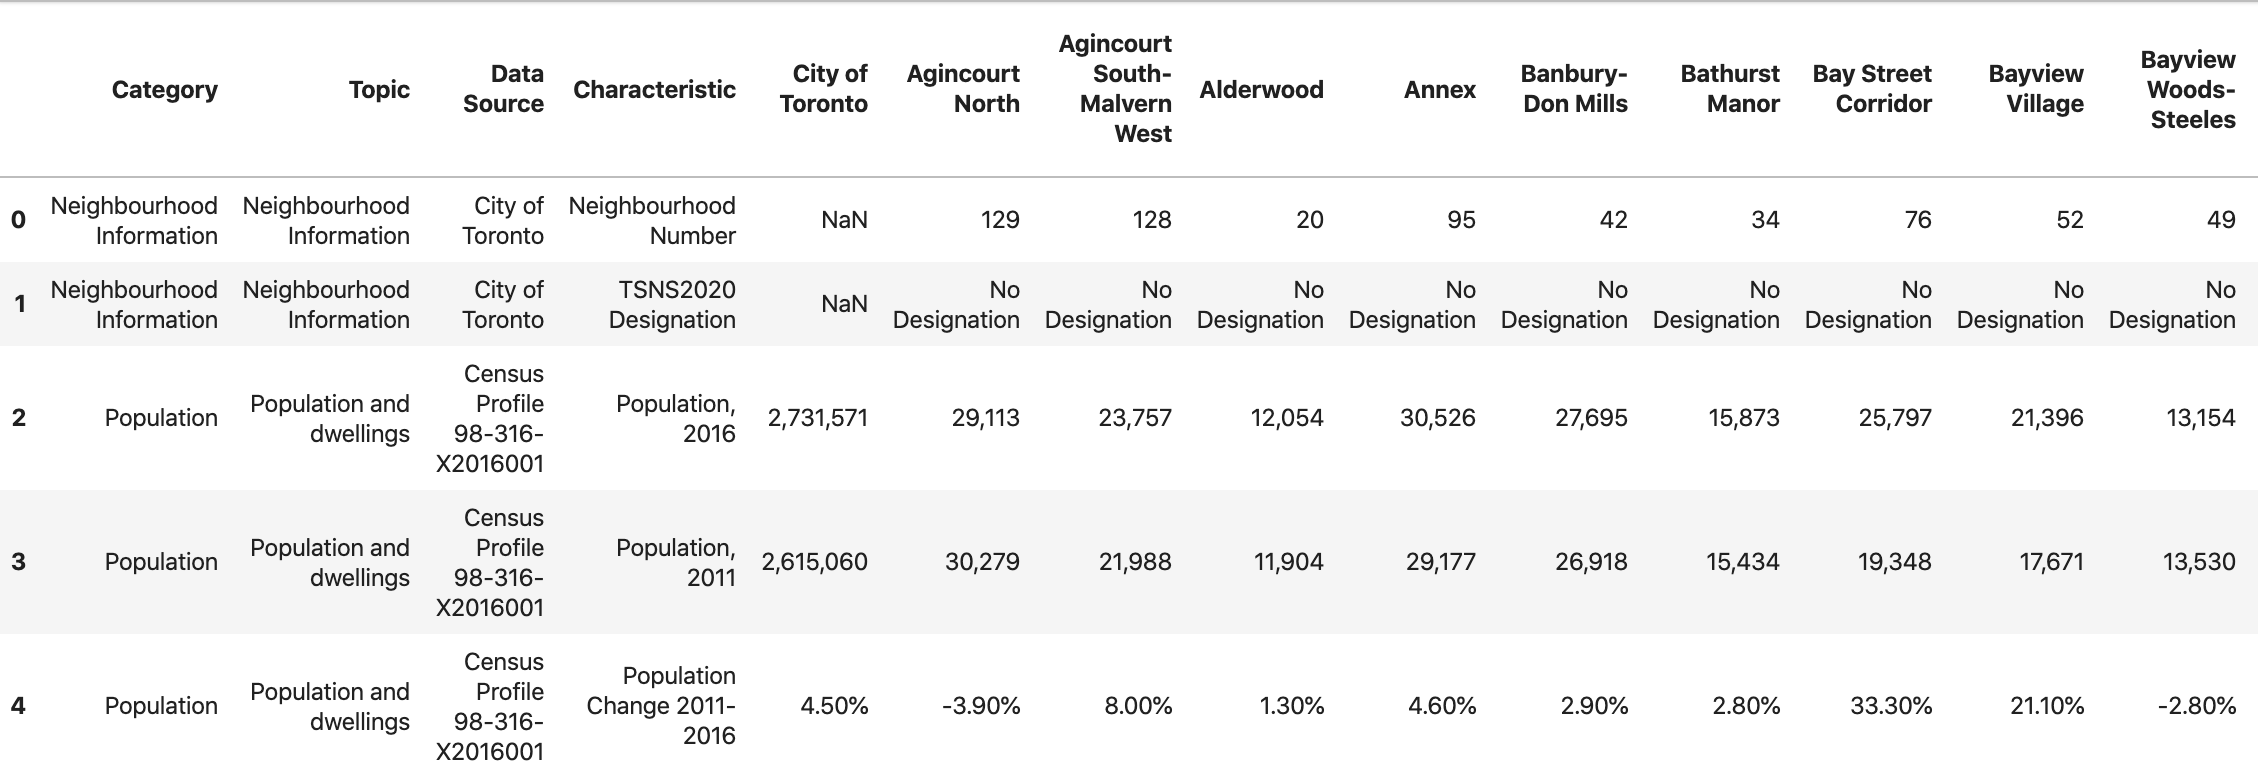

####  Foursquare data about restaurants in Toronto  (Dataset 2)

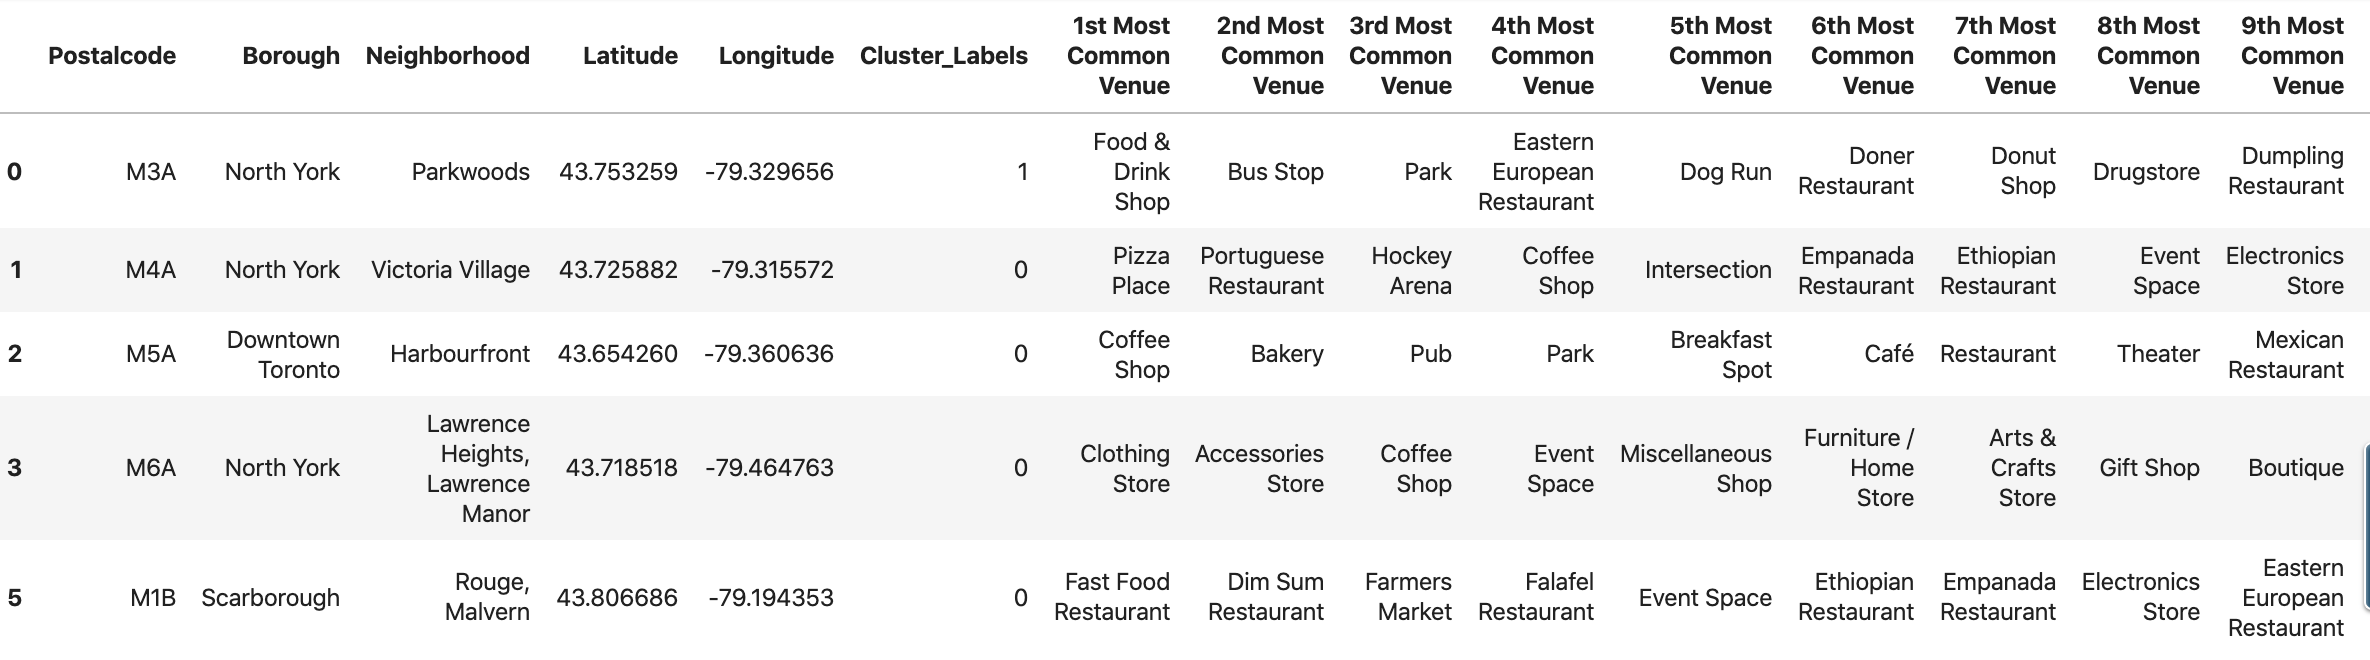

#### Cultural Hotspot - Points of Interest  (Dataset 3)

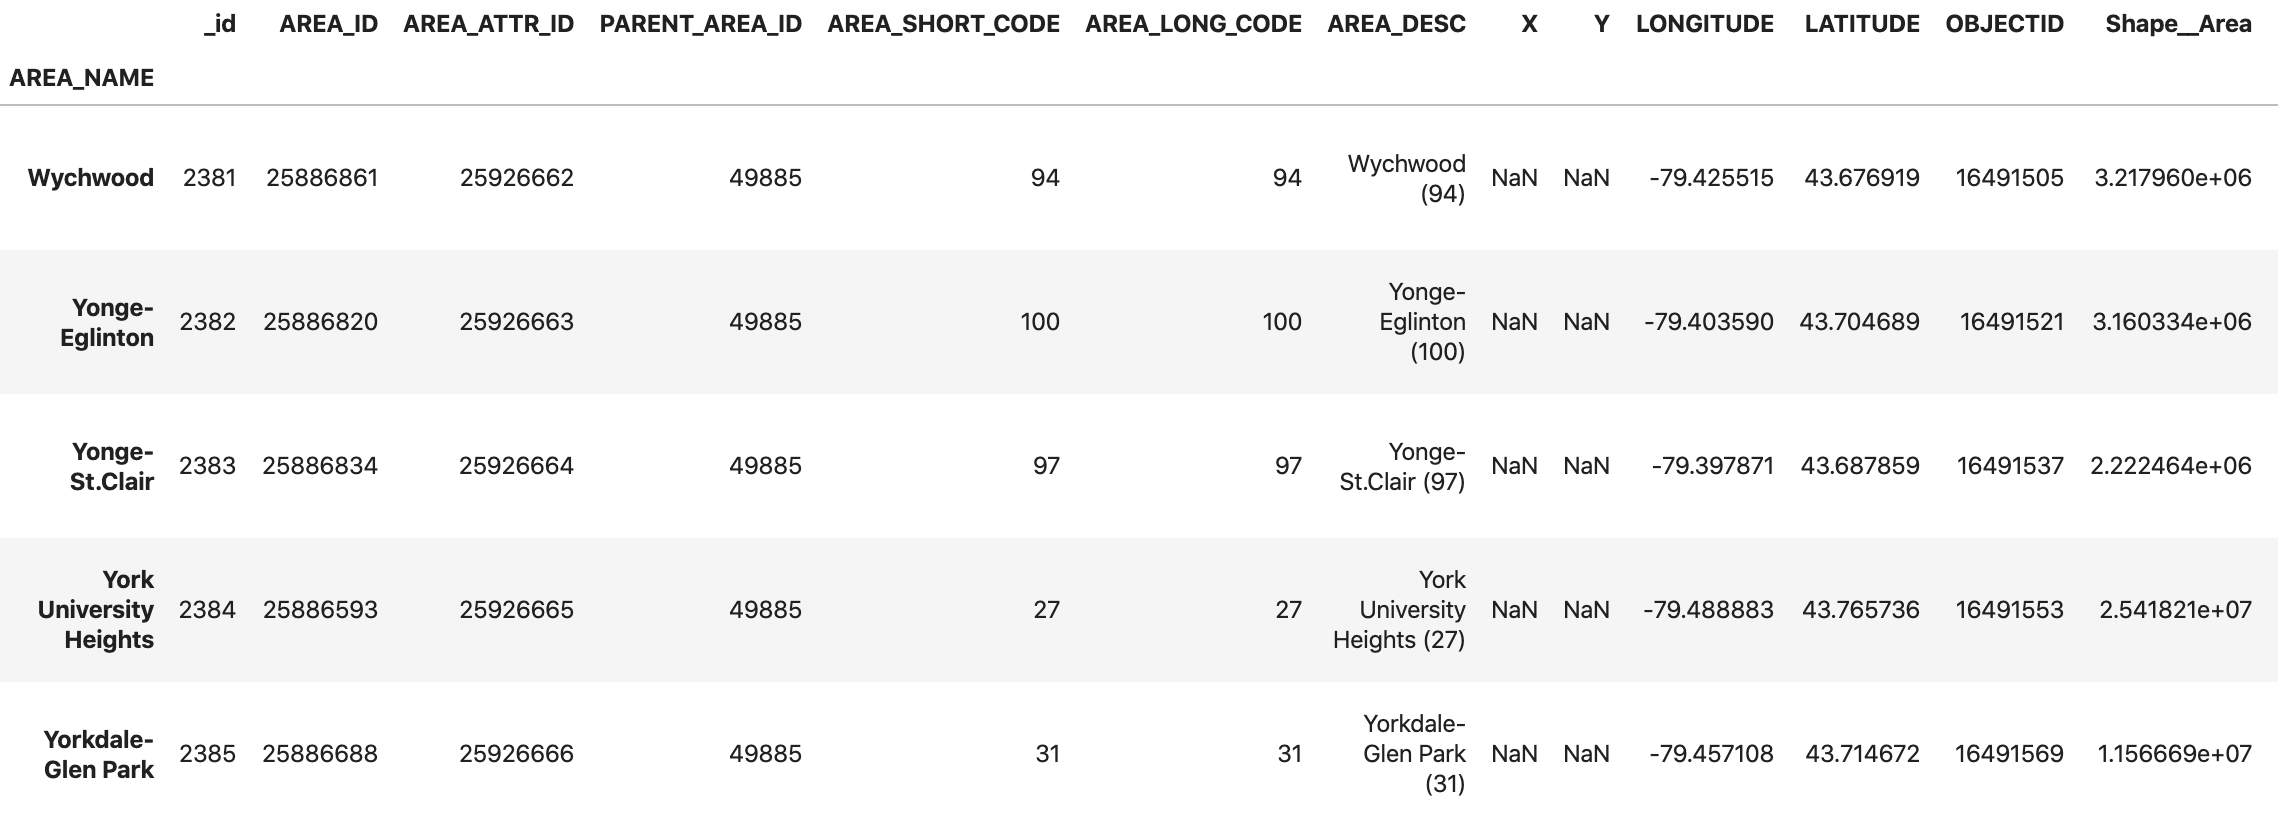

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [8]:
csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


##### Data preview

In [9]:
df.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

In [151]:
csv_path='https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326'
df2 = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


In [152]:
df2['AREA_NAME'] = df2['AREA_NAME'].str.split('(').str[0]
df2 = df2.set_index('AREA_NAME')
df2.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
AREA_NAME,,,,,,,,,,,,,,,
Wychwood,2381,25886861,25926662,49885,94,94,Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
Yonge-Eglinton,2382,25886820,25926663,49885,100,100,Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
Yonge-St.Clair,2383,25886834,25926664,49885,97,97,Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
York University Heights,2384,25886593,25926665,49885,27,27,York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
Yorkdale-Glen Park,2385,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


##### Collecting Population and Income per neighborhood

Transpose 'Population' and 'Income' from 'Catagory' column
Creating a new dataset (First 5 Columns are dropped)

In [83]:
popTmp = (df[df['Category']=='Population'].T)[2]
incTmp = (df[df['Category']=='Income'].T)[2264]

latTmp = (df[df['Category']=='Population'])[2]
longTmp =




dfToronto = pd.concat([popTmp, incTmp], axis=1, join='inner')
dfToronto.columns = ['Population', 'Income']
dfToronto = dfToronto.drop(['Category', 'Topic', 'Data Source', 'Characteristic', 'City of Toronto'], axis=0)
dfToronto.sort_values('Income')

,Population,Income
St.Andrew-Windfields,"17,812","100,516"
Edenbridge-Humber Valley,"15,535","101,551"
Lawrence Park North,"14,607","111,730"
Annex,"30,526","112,766"
Yonge-St.Clair,"12,528","114,174"
Bedford Park-Nortown,"23,236","123,077"
Leaside-Bennington,"16,828","125,564"
Kingsway South,"9,271","144,642"
Casa Loma,"10,968","165,047"
Lawrence Park South,"15,179","169,203"


In [76]:
https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/c3ebef25-177b-4adc-9c47-8763b04a52fb

csv_path='https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/64ae2754-9d25-4fa2-8abc-716124a10d60'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 69, saw 4
